![for sale image, from https://time.com/5835778/selling-home-coronavirus/](https://api.time.com/wp-content/uploads/2020/05/selling-home-coronavirus.jpg?w=800&quality=85)

# Project Title

## Overview

A one-paragraph overview of the project, including the business problem, data, methods, results and recommendations.

## Business Problem

Summary of the business problem you are trying to solve, and the data questions that you plan to answer to solve them.

Questions to consider:

- Who are your stakeholders?
- What are your stakeholders' pain points related to this project?
- Why are your predictions important from a business perspective?

## Data Understanding

Describe the data being used for this project.

Questions to consider:

- Where did the data come from, and how do they relate to the data analysis questions?
- What do the data represent? Who is in the sample and what variables are included?
- What is the target variable?
- What are the properties of the variables you intend to use?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [2]:
# # utils.py
# import matplotlib.pyplot as plt
# from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

def evaluate(y_train, train_preds, y_test, test_preds):
    '''
    Evaluate the amount of error between my model's predictionms and the actual values
    for both a train and a test set
    
    Inputs: 
        y_train - array like, actual values for 'price for my train dataset
        train_preds - array like, predicted values for 'price' for my train dataset
        y_test
        test_preds
    
    Outputs:
        None
    '''
    print(f"Train R2: {r2_score(y_train, train_preds):.4f}")
    print(f"Test R2: {r2_score(y_test, test_preds):.4f}")
    print("*****")
    print(f"Train RMSE: ${mean_squared_error(y_train, train_preds, squared=False):,.2f}")
    print(f"Train RMSE: ${mean_squared_error(y_test, test_preds, squared=False):,.2f}")
    print("*****")
    print(f"Train MAE: ${mean_absolute_error(y_train, train_preds):,.2f}")
    print(f"Train MAE: ${mean_absolute_error(y_test, test_preds):,.2f}")
    print("*****")
    
    # Calculate our residuals 
    train_residuals = y_train - train_preds
    test_residuals = y_test - test_preds
    
    # Scatter plot 
    plt.scatter(train_preds, train_residuals, label = 'Train')
    plt.scatter(test_preds, test_residuals, label = 'Test')
    
    plt.axhline(y=0, color = 'red', label = '0')
    plt.xlabel('predictions')
    plt.ylabel('residuals')
    plt.legend()
    
    sm.qqplot(train_residuals, line = 'r', label = 'train residuals');
    plt.legend()
    
    sm.qqplot(test_residuals, line = 'r', label = 'test residuals');
    plt.legend()
    plt.show()
    
    

In [3]:
# code here to explore your data
!ls ../../data

column_names.md   kc_house_data.csv


In [4]:
df = pd.read_csv('../../data/kc_house_data.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [6]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [7]:
mansion_df = df[df['bedrooms'] == 33]
mansion_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15856,2402100895,6/25/2014,640000.0,33,1.75,1620,6000,1.0,NO,NONE,...,7 Average,1040,580.0,1947,0.0,98103,47.6878,-122.331,1330,4700


In [8]:
df['date'].value_counts()

6/23/2014    142
6/25/2014    131
6/26/2014    131
7/8/2014     127
4/27/2015    126
            ... 
7/27/2014      1
5/24/2015      1
5/15/2015      1
5/27/2015      1
8/30/2014      1
Name: date, Length: 372, dtype: int64

In [9]:
df['waterfront'].value_counts()

NO     19075
YES      146
Name: waterfront, dtype: int64

In [10]:
df['view'].value_counts()

NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

In [11]:
df['condition'].value_counts()

Average      14020
Good          5677
Very Good     1701
Fair           170
Poor            29
Name: condition, dtype: int64

In [12]:
df['grade'].value_counts().sort_index(ascending = True)

10 Very Good     1134
11 Excellent      399
12 Luxury          89
13 Mansion         13
3 Poor              1
4 Low              27
5 Fair            242
6 Low Average    2038
7 Average        8974
8 Good           6065
9 Better         2615
Name: grade, dtype: int64

In [13]:
#sns.pairplot(df)
#plt.show();

In [14]:
np.abs(df.corr()['price']).sort_values(ascending = False)

price            1.000000
sqft_living      0.701917
sqft_above       0.605368
sqft_living15    0.585241
bathrooms        0.525906
bedrooms         0.308787
lat              0.306692
floors           0.256804
yr_renovated     0.129599
sqft_lot         0.089876
sqft_lot15       0.082845
yr_built         0.053953
zipcode          0.053402
long             0.022036
id               0.016772
Name: price, dtype: float64

In [15]:
#notes from lindsey
obj_column = [c for c in df.columns if df[c].dtype == 'object']
df[obj_column].describe()

,date,waterfront,view,condition,grade,sqft_basement
count,21597,19221,21534,21597,21597,21597
unique,372,2,5,5,11,304
top,6/23/2014,NO,NONE,Average,7 Average,0.0
freq,142,19075,19422,14020,8974,12826


In [16]:
num_column = [c for c in df.columns if df[c].dtype in ['int64', 'float64']]
df[num_column].describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## Data Preparation

Describe and justify the process for preparing the data for analysis.

Questions to consider:

- Were there variables you dropped or created?
- How did you address missing values or outliers?
- Why are these choices appropriate given the data and the business problem?

In [17]:
#Replace 33 bedrooms with 3 bedrooms, since 3 is the mean for bedroom count in this dataset
#We suspect this was a typing error when entering the home data
df['bedrooms'].replace(33, 3, inplace=True)

In [18]:
#Change ? entries for sqft_basement
#This is done by subtracting the sqft_above from sqft_living
df['sqft_basement_diff']= df['sqft_living'] - df['sqft_above']

In [19]:
#Change the entries in waterfront from YES/NO to 1/0
df['waterfront'].replace("YES", 1, inplace=True)
df['waterfront'].replace("NO", 0, inplace=True)
df['waterfront'].fillna(value=0,inplace=True)

In [20]:
#Change the null entries for yr_renovated to 0
df['yr_renovated'].fillna(value=0,inplace=True)

In [21]:
#Change the null values for view to NONE
df['view'].fillna(value='NONE',inplace=True)

In [22]:
# code here to prepare your data
#FOCUS ON PROCESSING THE VIEW THE VIEW COLUMN

In [23]:
# import OneHotEncoder from sklearn.preprocessing
from sklearn.preprocessing import OneHotEncoder



In [24]:
# Create a variable for view column
view_col = df[["view"]]

# Instantiate a OneHotEncoder with categories="auto",
# sparse=False, and handle_unknown="ignore"
ohe_view = OneHotEncoder(categories="auto",sparse=False, handle_unknown="ignore")

# Fit the encoder on view_col
ohe_view.fit(view_col)

# Inspect the categories of the fitted encoder
ohe_view.categories_

[array(['AVERAGE', 'EXCELLENT', 'FAIR', 'GOOD', 'NONE'], dtype=object)]

In [25]:
# Transform view_col using the encoder and
# assign the result to view_col_encoded
view_col_encoded = ohe_view.transform(view_col)

# Visually inspect view_col_encoded
view_col_encoded

array([[0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]])

In [26]:
# Make the transformed data into a dataframe
view_col_encoded = pd.DataFrame(
    # Pass in NumPy array
    view_col_encoded,
    # Set the column names to the categories found by OHE
    columns="view_"+ohe_view.categories_[0],
    # Set the index to match X_train's index
    index=df.index
)

# Visually inspect new dataframe
view_col_encoded

,view_AVERAGE,view_EXCELLENT,view_FAIR,view_GOOD,view_NONE
0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...
21592,0.0,0.0,0.0,0.0,1.0
21593,0.0,0.0,0.0,0.0,1.0
21594,0.0,0.0,0.0,0.0,1.0
21595,0.0,0.0,0.0,0.0,1.0


In [27]:
# Drop original view column
df.drop("view", axis=1, inplace=True)

# Concatenate the new dataframe with current df
df = pd.concat([df, view_col_encoded], axis=1)

# Visually inspect df
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,...,lat,long,sqft_living15,sqft_lot15,sqft_basement_diff,view_AVERAGE,view_EXCELLENT,view_FAIR,view_GOOD,view_NONE
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,Average,...,47.5112,-122.257,1340,5650,0,0.0,0.0,0.0,0.0,1.0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,Average,...,47.7210,-122.319,1690,7639,400,0.0,0.0,0.0,0.0,1.0
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,Average,...,47.7379,-122.233,2720,8062,0,0.0,0.0,0.0,0.0,1.0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,Very Good,...,47.5208,-122.393,1360,5000,910,0.0,0.0,0.0,0.0,1.0
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,Average,...,47.6168,-122.045,1800,7503,0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,Average,...,47.6993,-122.346,1530,1509,0,0.0,0.0,0.0,0.0,1.0
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,Average,...,47.5107,-122.362,1830,7200,0,0.0,0.0,0.0,0.0,1.0
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,Average,...,47.5944,-122.299,1020,2007,0,0.0,0.0,0.0,0.0,1.0
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,0.0,Average,...,47.5345,-122.069,1410,1287,0,0.0,0.0,0.0,0.0,1.0


## Modeling

Describe and justify the process for analyzing or modeling the data.

Questions to consider:

- How did you analyze the data to arrive at an initial approach?
- How did you iterate on your initial approach to make it better?
- Why are these choices appropriate given the data and the business problem?

### Train/Test Split

In [28]:
#Create X and y

y = df['price']
X = df.drop(columns=['id', 'price'])

In [29]:
# Train test split -reserving 25%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [30]:
#Exploring the describes across my train and test set to see if they are equivalent
print('X Train:')
display(X_train.describe())
print('X Test:')
display(X_test.describe())

X Train:


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_basement_diff,view_AVERAGE,view_EXCELLENT,view_FAIR,view_GOOD,view_NONE
count,16197.000000,16197.000000,16197.000000,1.619700e+04,16197.000000,16197.000000,16197.000000,16197.000000,16197.000000,16197.000000,16197.000000,16197.000000,16197.000000,16197.000000,16197.000000,16197.000000,16197.000000,16197.000000,16197.000000,16197.000000
mean,3.372229,2.116426,2083.693030,1.507189e+04,1.494752,0.006853,1790.467926,1971.019942,67.419522,98078.100080,47.560975,-122.213720,1987.809286,12784.065074,293.225103,0.042909,0.015126,0.015126,0.023338,0.903501
std,0.905951,0.768049,918.209756,4.077585e+04,0.540474,0.082502,827.598600,29.325399,360.641442,53.486457,0.138273,0.141639,685.189105,26833.379871,443.148845,0.202659,0.122059,0.122059,0.150978,0.295284
min,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,1.750000,1430.000000,5.058000e+03,1.000000,0.000000,1200.000000,1952.000000,0.000000,98033.000000,47.472500,-122.329000,1490.000000,5100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,3.000000,2.250000,1912.000000,7.620000e+03,1.500000,0.000000,1560.000000,1975.000000,0.000000,98065.000000,47.573300,-122.231000,1840.000000,7620.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,4.000000,2.500000,2560.000000,1.072000e+04,2.000000,0.000000,2220.000000,1997.000000,0.000000,98117.000000,47.678300,-122.124000,2360.000000,10086.000000,570.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,11.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,4820.000000,1.000000,1.000000,1.000000,1.000000,1.000000


X Test:


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_basement_diff,view_AVERAGE,view_EXCELLENT,view_FAIR,view_GOOD,view_NONE
count,5400.000000,5400.000000,5400.000000,5.400000e+03,5400.000000,5400.000000,5400.000000,5400.000000,5400.000000,5400.000000,5400.000000,5400.000000,5400.000000,5400.000000,5400.000000,5400.000000,5400.000000,5400.000000,5400.000000,5400.000000
mean,3.370556,2.114028,2070.210185,1.518194e+04,1.492130,0.006481,1782.984630,1970.938889,72.773519,98077.507222,47.557447,-122.214770,1983.054074,12680.953148,287.225556,0.048519,0.013333,0.015741,0.024074,0.898333
std,0.898592,0.771851,917.805949,4.327026e+04,0.537347,0.080254,828.294279,29.526848,374.044172,53.595322,0.139365,0.137951,685.405621,28558.979278,441.232142,0.214879,0.114708,0.124482,0.153293,0.302237
min,1.000000,0.750000,410.000000,6.090000e+02,1.000000,0.000000,410.000000,1900.000000,0.000000,98001.000000,47.162200,-122.515000,670.000000,659.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,1.750000,1420.000000,5.001000e+03,1.000000,0.000000,1190.000000,1951.000000,0.000000,98032.000000,47.465725,-122.327000,1480.000000,5100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,3.000000,2.250000,1910.000000,7.616500e+03,1.500000,0.000000,1550.000000,1975.000000,0.000000,98065.000000,47.568900,-122.228000,1830.000000,7619.500000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,4.000000,2.500000,2520.000000,1.058800e+04,2.000000,0.000000,2200.000000,1997.000000,0.000000,98118.000000,47.677500,-122.127000,2370.000000,10080.000000,550.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,10.000000,7.750000,10040.000000,1.164794e+06,3.000000,1.000000,8860.000000,2015.000000,2015.000000,98199.000000,47.777500,-121.315000,5790.000000,858132.000000,3260.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Visual Data Exploration

In [31]:
#Create a train df
train_df = pd.concat([X_train, y_train], axis = 1)
#Look at a pairplot across my train dataframe
#sns.pairplot(train_df);

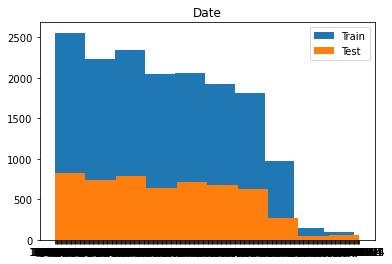

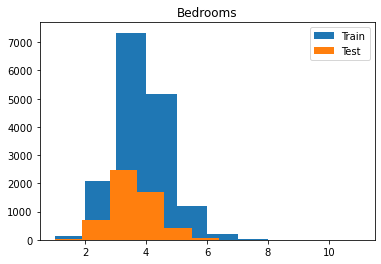

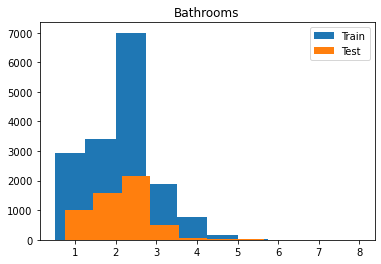

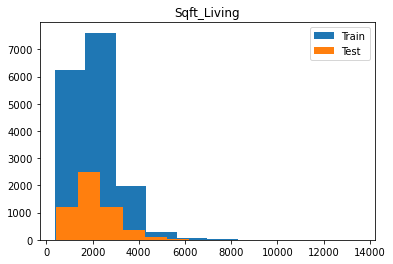

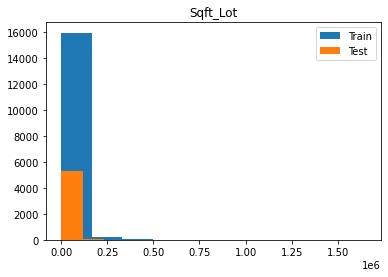

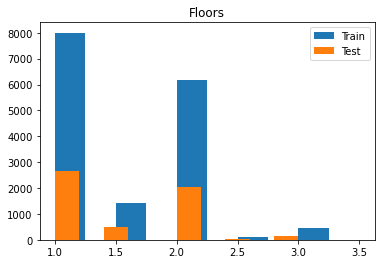

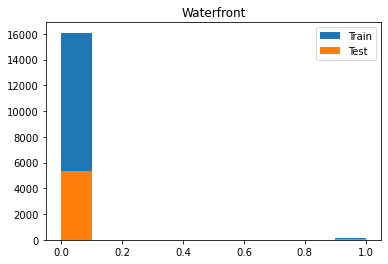

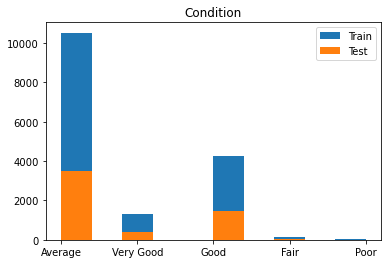

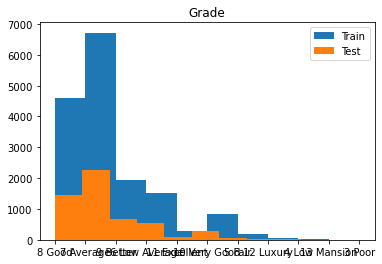

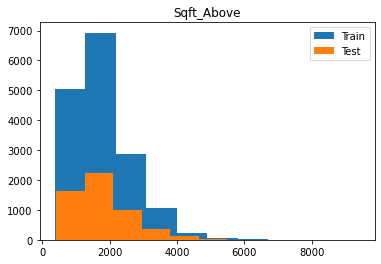

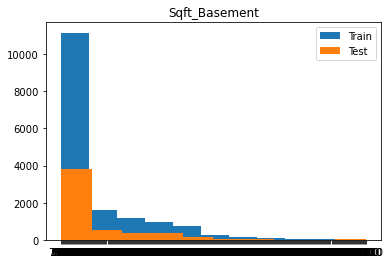

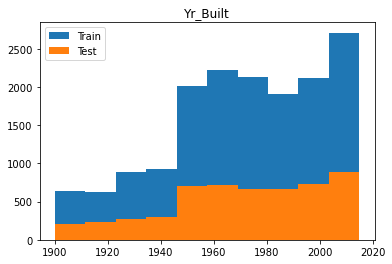

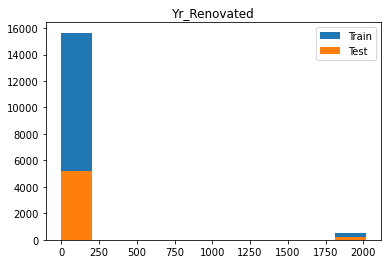

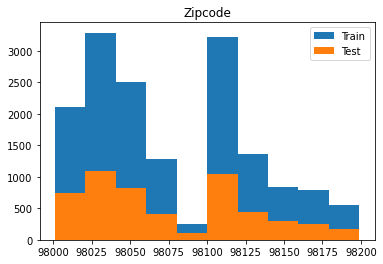

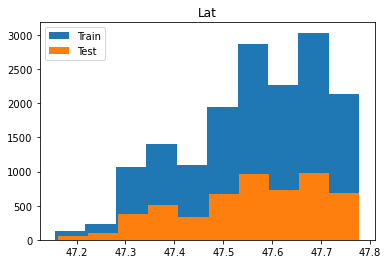

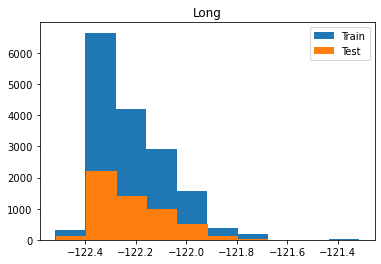

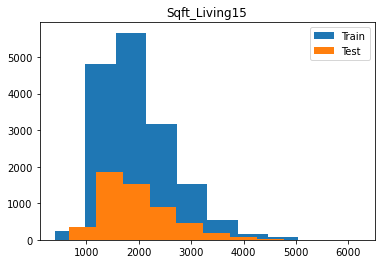

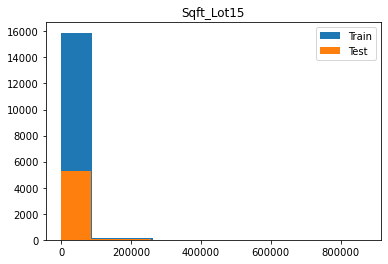

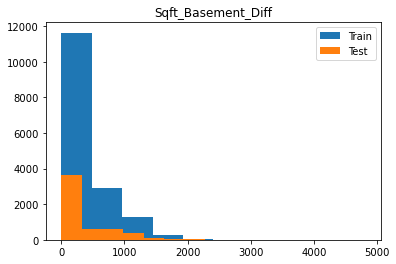

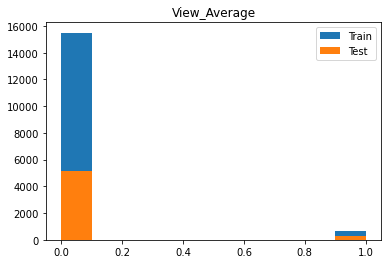

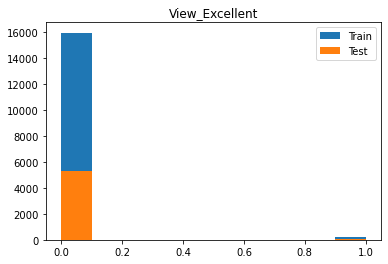

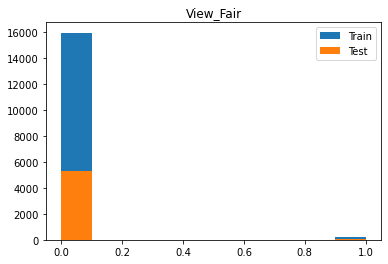

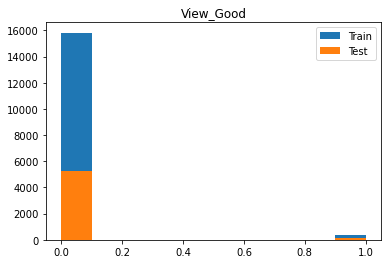

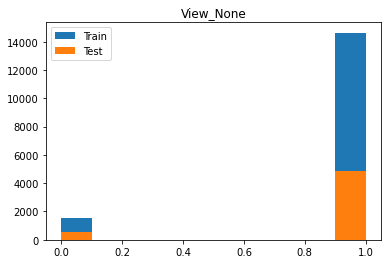

In [32]:
#Exploring distributions across train and test predictors
for col in X_train.columns:
    plt.hist(X_train[col], label = "Train")
    plt.hist(X_test[col], label = "Test")
    plt.title(f"{col.title()}")
    plt.legend()
    plt.show();

Markdown explaining what I observe visually in my columns

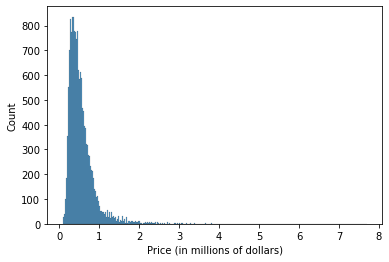

In [33]:
#Do want to explore my target
sns.histplot(y_train/1000000)
plt.xlabel('Price (in millions of dollars)');

Markdown explaining what I observe about my target

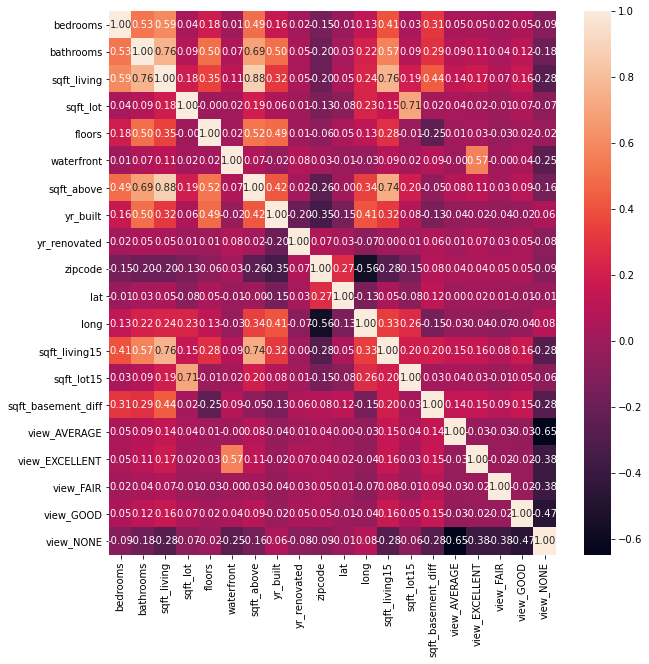

In [34]:
#Explore heatmap of correlations accross my whole dataframe
plt.figure(figsize = (10,10))
sns.heatmap(X_train.corr(), annot = True, fmt = '.2f');

Markdown explaining what I've noticed about correlation among X-variables (multicollinearity)

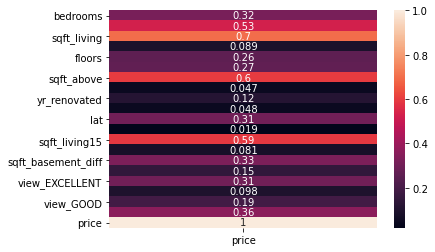

In [35]:
sns.heatmap(abs(train_df.corr())[['price']], annot = True);

In [36]:
np.abs(train_df.corr()['price']).sort_values(ascending = False)

price                 1.000000
sqft_living           0.700397
sqft_above            0.601355
sqft_living15         0.591150
bathrooms             0.529906
view_NONE             0.363970
sqft_basement_diff    0.328176
bedrooms              0.320253
lat                   0.306659
view_EXCELLENT        0.306340
waterfront            0.267665
floors                0.257826
view_GOOD             0.188906
view_AVERAGE          0.146068
yr_renovated          0.116552
view_FAIR             0.097989
sqft_lot              0.089019
sqft_lot15            0.080682
zipcode               0.047865
yr_built              0.046835
long                  0.019459
Name: price, dtype: float64

Markdown explaining the relationship I'm seeing between my X and y variables in my training data

## Evaluation

The evaluation of each model should accompany the creation of each model, and you should be sure to evaluate your models consistently.

Evaluate how well your work solves the stated business problem. 

Questions to consider:

- How do you interpret the results?
- How well does your model fit your data? How much better is this than your baseline model? Is it over or under fit?
- How well does your model/data fit any modeling assumptions?

For the final model, you might also consider:

- How confident are you that your results would generalize beyond the data you have?
- How confident are you that this model would benefit the business if put into use?

### Baseline Understanding

- What does a baseline, model-less prediction look like?

In [37]:
# code here to arrive at a baseline prediction
train_target_mean = y_train.mean()
train_target_mean

541284.4615669568

In [38]:
#Get my predictions
baseline_train_preds = [train_target_mean] * len(y_train)
baseline_test_preds = [train_target_mean] * len(y_test)
r2_score(y_train, baseline_train_preds)
print(f"Train R2: {r2_score(y_train, baseline_train_preds)}")
print(f"Test R2: {r2_score(y_test, baseline_test_preds)}")
print("***")
print(f"Train RMSE : {mean_squared_error(y_train , baseline_train_preds)}")
print(f"Test RMSE : {mean_squared_error(y_test , baseline_test_preds)}")

Train R2: 0.0
Test R2: -0.0001137788699303588
***
Train RMSE : 134200189813.22363
Test RMSE : 137215320927.51886


### First $&(@# Model

Before going too far down the data preparation rabbit hole, be sure to check your work against a first 'substandard' model! What is the easiest way for you to find out how hard your problem is?

In [39]:
# code here for your first 'substandard' model
fsm_X_train = X_train['sqft_living']
fsm_X_test = X_test['sqft_living']

In [40]:
# code here to evaluate your first 'substandard' model
fsm = sm.OLS(y_train, sm.add_constant(fsm_X_train)).fit()
fsm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.491
Model:                            OLS   Adj. R-squared:                  0.491
Method:                 Least Squares   F-statistic:                 1.559e+04
Date:                Tue, 05 Oct 2021   Prob (F-statistic):               0.00
Time:                        20:59:37   Log-Likelihood:            -2.2503e+05
No. Observations:               16197   AIC:                         4.501e+05
Df Residuals:                   16195   BIC:                         4.501e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.099e+04   5095.343     -8.044      0.000    -5.1e+04    -3.1e+04
sqft_living   279.4423      2.238    124.878      0.000     275.056     283.828
==============================================================================
Omnibus:                    10430.239   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           291279.150
Skew:                           2.656   Prob(JB):                         0.00
Kurtosis:                      23.084   Cond. No.                     5.65e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.65e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [41]:
fsm_train_preds = fsm.predict(sm.add_constant(fsm_X_train))
fsm_test_preds = fsm.predict(sm.add_constant(fsm_X_test))

print(f"Train R2: {r2_score(y_train, fsm_train_preds)}")
print(f"Test R2: {r2_score(y_test, fsm_test_preds)}")
print("***")
print(f"Train RMSE : {mean_squared_error(y_train , fsm_train_preds, squared = False)}")
print(f"Test RMSE : {mean_squared_error(y_test , fsm_test_preds, squared = False)}")

Train R2: 0.49055555791820304
Test R2: 0.4988509662233589
***
Train RMSE : 261471.87387302093
Test RMSE : 262216.5180747793


In [43]:
logged_fsm_y_train= np.log(y_train)
logged_fsm_y_test = np.log(y_test)
fsm_logged = sm.OLS(logged_fsm_y_train, sm.add_constant(fsm_X_train)).fit()
fsm_logged.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.483
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                 1.514e+04
Date:                Tue, 05 Oct 2021   Prob (F-statistic):               0.00
Time:                        20:59:44   Log-Likelihood:                -7274.1
No. Observations:               16197   AIC:                         1.455e+04
Df Residuals:                   16195   BIC:                         1.457e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          12.2179      0.007   1653.638      0.000      12.203      12.232
sqft_living     0.0004   3.24e-06    123.040      0.000       0.000       0.000
==============================================================================
Omnibus:                        2.151   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.341   Jarque-Bera (JB):                2.122
Skew:                           0.025   Prob(JB):                        0.346
Kurtosis:                       3.026   Cond. No.                     5.65e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.65e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Train R2: 0.4831
Test R2: 0.4836
*****
Train RMSE: $0.38
Train RMSE: $0.38
*****
Train MAE: $0.31
Train MAE: $0.31
*****


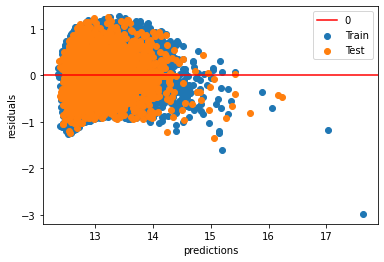

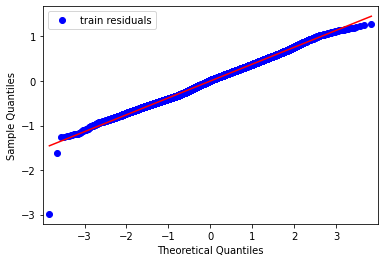

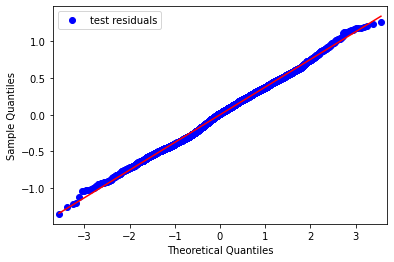

In [44]:
logged_fsm_train_preds = fsm_logged.predict(sm.add_constant(fsm_X_train))
logged_fsm_test_preds = fsm_logged.predict(sm.add_constant(fsm_X_test))

evaluate(logged_fsm_y_train, logged_fsm_train_preds, logged_fsm_y_test, logged_fsm_test_preds)

### Modeling Iterations

Now you can start to use the results of your first model to iterate - there are many options!

In [54]:
# code here to iteratively improve your models
#second_df = pd.DataFrame(columns=['pred_2', 'pred_3', 'r-squared'])
second_dict = {'pred_2': [], 'pred_3': [], 'r-squared':[]}
for c in X_train.columns:
    if c not in ['sqft_living', 'date', 'condition', 'grade', 'sqft_basement']:
        for c2 in X_train.columns:
            if c2 not in [c,'sqft_living', 'date', 'condition', 'grade', 'sqft_basement']:
                test_list = ['sqft_living', c, c2]
                #print(test_list)
                second_X_train= X_train[test_list]
                second_X_test = X_test[test_list]
                second = sm.OLS(logged_fsm_y_train, sm.add_constant(second_X_train)).fit()
                second_train_preds = second.predict(sm.add_constant(second_X_train))
                second_test_preds = second.predict(sm.add_constant(second_X_test))
                #print(f"{c} and {c2} = {r2_score(logged_fsm_y_train, second_train_preds)}")
                #second_df.append({'pred_2':c, 'pred_3':c2, 'r-squared':r2_score(logged_fsm_y_train, second_train_preds)}, ignore_index=True) 
                second_dict['pred_2'].append(c)
                second_dict['pred_3'].append(c2)
                second_dict['r-squared'].append(r2_score(logged_fsm_y_train, second_train_preds))
second_df = pd.DataFrame(second_dict).sort_values(by=['r-squared'], ascending = False)
second_df.head(10)

,pred_2,pred_3,r-squared
179,lat,view_NONE,0.674664
333,view_NONE,lat,0.674664
172,lat,sqft_living15,0.672127
207,sqft_living15,lat,0.672127
80,waterfront,lat,0.664985
166,lat,waterfront,0.664985
279,view_EXCELLENT,lat,0.664336
176,lat,view_EXCELLENT,0.664336
168,lat,yr_built,0.659499
116,yr_built,lat,0.659499


In [ ]:
# code here to evaluate your iterations

### 'Final' Model

In the end, you'll arrive at a 'final' model - aka the one you'll use to make your recommendations/conclusions. This likely blends any group work. It might not be the one with the highest scores, but instead might be considered 'final' or 'best' for other reasons.

In [ ]:
# code here to show your final model

In [ ]:
# code here to evaluate your final model

## Conclusions

Provide your conclusions about the work you've done, including any limitations or next steps.

Questions to consider:

- What would you recommend the business do as a result of this work?
- What are some reasons why your analysis might not fully solve the business problem?
- What else could you do in the future to improve this project (future work)?
